## QA Answer/Question type classification for HotpotQA
Test out two methods on hotpotQA:
- Simple rule based method [qaclassifer](https://github.com/OlaSearch/qaclassifer)
- BERT + CNN from [simple-qc](https://github.com/eduardogc8/simple-qc/blob/master/benchmark.ipynb)

### Simple rules based method 

In [1]:
import sys
from util import get_buckets

import numpy as np
import os
import time
import json

%matplotlib inline
import random
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd 

In [2]:
# HotpotQA Dataset
train_buckets = get_buckets('train_record.pkl')
X_train = train_buckets[0]

# To map preprocessed questions from [idx] back to [words]
with open('idx2word.json', 'r') as fh:	
    idx2word_dict = json.load(fh)
    
# To fetch the gold answer for each question
hotpot_train_file = "train_eval.json"
with open(hotpot_train_file, "r", encoding = 'utf-8') as handle:
    hotpot_train = json.load(handle)

# Questions’ order in train_record.pkl is different from hotpot_train_v1.1.json and train_eval.json, can be mapped by _id

In [7]:
X_train[0]

{'context_idxs': tensor([373618,   3098,      5,  ...,      0,      0,      0]),
 'context_char_idxs': tensor([[25, 14, 26,  ...,  0,  0,  0],
         [52,  7, 10,  ...,  0,  0,  0],
         [ 7, 10, 16,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]]),
 'ques_idxs': tensor([ 3098,     5, 24505, 32564,     4, 34445,    12,     4,  5395,  3021,
          1186,    26,     8,  1165,    31,    80,   472,    39,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0

In [9]:
hotpot_train['5adc07c7554299438c868d0c']

{'context': '<t> Dance and Laugh Amongst the Rotten </t>Dance and Laugh Amongst the Rotten is the fifth studio album by Dutch symphonic black metal band Carach Angren. It was released on June 16, 2017 via Season of Mist.<t> Ithyphallic (album) </t>Ithyphallic is the fifth studio album by American technical death metal band Nile. It was released on July 17, 2007 through Nuclear Blast, in both standard and digipak formats. It is the band\'s first album released on Nuclear Blast, since signing with them in May 2006. It is also the band\'s first album since "Amongst the Catacombs of Nephren-Ka" not to feature notes explaining the context of the lyrics. 1,000 limited edition copies of the album were released in a pyramid-shaped box containing the disc, several images, a certificate of ownership and a scroll containing the lyrics and liner notes from the album. The cover art of this album depicts a statue of the god of fertility "Min", being erected by Egyptian slaves. The title means "Erect

In [2]:
#!pip install -e git+https://github.com/OlaSearch/qaclassifer.git#egg=qaclassifier
sys.path.insert(0, '/Users/fan/Documents/Research/mul-hop-viz/experiments/hotpot/src/qaclassifier/')   
!sed -i '' "s/words\[0\] == \('[^\s']*'\)/\1 in words/g" /Users/fan/Documents/Research/mul-hop-viz/experiments/hotpot/src/qaclassifier/qaclassifier/classify.py

In [ ]:
from qaclassifier import QuestionClassifier
clf = QuestionClassifier()
print(clf.isQuestion('Dance and Laugh Amongst the Rotten is the fifth studio album by a band from what country ?'))
print(clf.classify('Dance and Laugh Amongst the Rotten is the fifth studio album by a band from what country ?'))
print(clf.classify('what country Dance and Laugh Amongst the Rotten is the fifth studio album by a band from ?'))

#### Run qaclassifer on HotpotQA

In [305]:
# Use dataframe to store questions' [ques_idxs, ques_words, answer_type_pred]
question_list = []
for i, question in enumerate(X_train):
    ques_idxs = question['ques_idxs']
    ques_words = ' '.join([idx2word_dict[str(int(idx))] for idx in ques_idxs if idx>0])
    try:
        answer_type_pred = clf.classify(ques_words)
    except:
        answer_type_pred = None 
    
    ques_id = question['id']
    answer = hotpot_train[ques_id]['answer'][0]
    question_dict = {'ques_words':ques_words, 'answer_type_pred':answer_type_pred , 'answer':answer, 'ques_id':ques_id, 'ques_idxs':ques_idxs}
    question_list.append(question_dict)
question_df = pd.DataFrame(question_list)

question_df.head(3)

,answer,answer_type_pred,ques_id,ques_idxs,ques_words
0,the Netherlands,None,5adc07c7554299438c868d0c,"[3098, 5, 24505, 32564, 4, 34445, 12, 4, 5395, 3021, 1186, 26, 8, 1165, 31, 80, 472, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",Dance and Laugh Amongst the Rotten is the fifth studio album by a band from what country ?
1,Indianapolis 500,ENTY:product,5ae6962055429908198fa63f,"[24, 44424, 1356, 12, 41, 351, 6095, 10314, 7461, 8, 53565, 2, 13167, 1356, 185, 9, 69, 611, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","The Novi engine is an American dual overhead cam a supercharger , V8 engine used in which event ?"
2,2013,NUM:date,5ae69dbd5542992ae0d1637b,"[1, 10, 12, 8, 642, 26, 3034, 2067, 58415, 31, 93, 3029, 1186, 10, 192893, 10, 2, 1271, 9, 69, 154, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","--OOV-- "" is a song by recording artist M.I.A. from her fourth album "" Matangi "" , released in which year ?"


In [306]:
question_df.answer_type_pred.describe()

count     81327  
unique    45     
top       HUM:ind
freq      23794  
Name: answer_type_pred, dtype: object

In [307]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89791 entries, 0 to 89790
Data columns (total 5 columns):
answer              89791 non-null object
answer_type_pred    81327 non-null object
ques_id             89791 non-null object
ques_idxs           89791 non-null object
ques_words          89791 non-null object
dtypes: object(5)
memory usage: 3.4+ MB


In [308]:
# Distribution of predicted Answer types
grouped = question_df.groupby(['answer_type_pred'])
type_counts = grouped.size()  # count of each type
type_counts

answer_type_pred
ABBR:abb          31   
DESC:def          3358 
DESC:desc         824  
DESC:manner       271  
DESC:reason       213  
ENTY:animal       950  
ENTY:color        15   
ENTY:cremat       9207 
ENTY:dismed       97   
ENTY:event        1262 
ENTY:food         193  
ENTY:instru       50   
ENTY:lang         169  
ENTY:letter       24   
ENTY:other        756  
ENTY:plant        505  
ENTY:product      733  
ENTY:religion     42   
ENTY:sport        2158 
ENTY:substance    220  
ENTY:termeq       254  
ENTY:word         49   
HUM:def           172  
HUM:desc          50   
HUM:gr            5704 
HUM:ind           23794
HUM:title         1547 
LOC:city          2821 
LOC:country       2349 
LOC:mount         337  
LOC:other         7115 
LOC:state         746  
NUM:code          19   
NUM:count         1484 
NUM:date          10516
NUM:dist          107  
NUM:money         233  
NUM:other         873  
NUM:perc          7    
NUM:period        116  
NUM:speed         29   

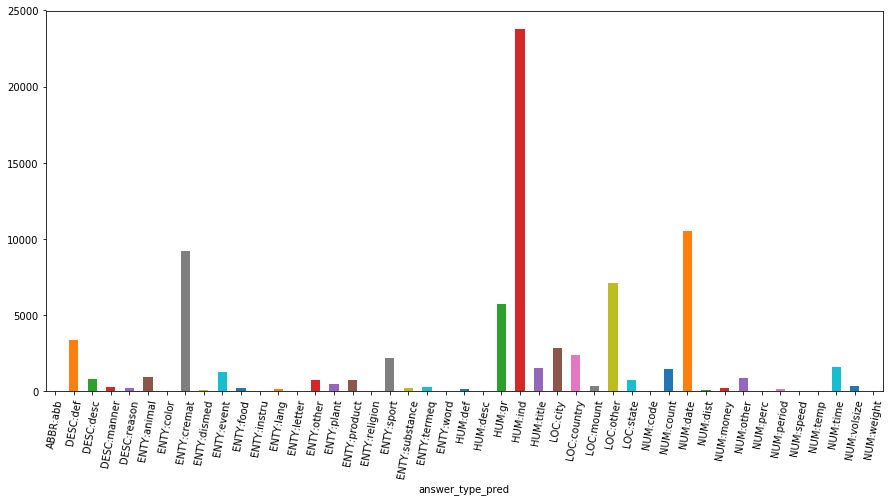

In [420]:
# also distribution of answer_type_pred
type_counts.plot(kind = 'bar', figsize=(15, 7))
plt.xticks(fontsize=10, rotation=80)
plt.show()
# plt.savefig('type_Distribution.png')

In [309]:
# randomly sample 30 question to manually evaluate the predicted answer type

# ignore None type and comparison questions
question_index_pool =  list(question_df.loc[pd.notna(question_df['answer_type_pred']) & (question_df['answer'] != 'yes') & (question_df['answer'] != 'no')].index)
random.seed(1)    # will generate same see only if do not restart kernel
np.random.seed(1)
random_idx = random.sample(question_index_pool, 30)
mini_question_df = question_df.loc[random_idx, ['ques_words', 'answer', 'answer_type_pred']].copy()
mini_question_df['answer_type_label'] = np.nan            # add a column for manual label
pd.set_option('display.max_colwidth', -1)                 # display full (non-truncated)  column
mini_question_df

,ques_words,answer,answer_type_pred,answer_type_label
19695,Darren marquez is an offensive lineman who played college football where before being hired by friends university in wichita ks as assistant coach,Southern Illinois Salukis.,LOC:other,NaN
83582,Jeep Gladiator is based on this car that was sold and produced from 1963 to when ?,1991,NUM:date,NaN
9255,What actor in the Calendar Girl Murders was born in March ?,Sharon Stone,HUM:ind,NaN
37406,Craig Frost is known as the keyboardist fo an American rock band whose names is a play on words of what ?,Grand Trunk Western Railroad,HUM:gr,NaN
17281,Diana Ross 's song I 'm Coming Out was written and produced by Nile Rodgers who was part of what band that has been active since 1976 ?,Chic,ENTY:cremat,NaN
72701,When was the songwriter of the song by The Beach boys refering to the --OOV-- born ?,"March 15, 1941",NUM:date,NaN
65941,Which luxury sedan 's --OOV-- is called the Master ?,Toyota Crown,DESC:def,NaN
69290,"In which year did Aimé Césaire publish her work , which was a response to Shakespeare 's play "" The Tempest ? """,1969,NUM:date,NaN
55715,Which country did both Klemens von Metternich and Richard von Metternich represent ?,Austrian,LOC:country,NaN
30785,"Which Swiss skier came in eights in the 7.5 km sprint event at the 2002 Winter Olympics in Salt Lake City , Utah ?",Andreas Hartmann,ENTY:event,NaN


#### Manually label

In [310]:
mini_question_df.loc[[random_idx[0]]]

,ques_words,answer,answer_type_pred,answer_type_label
19695,Darren marquez is an offensive lineman who played college football where before being hired by friends university in wichita ks as assistant coach,Southern Illinois Salukis.,LOC:other,NaN


In [311]:
mini_question_df.loc[random_idx[0], 'answer_type_label'] = 'LOC:other'

In [312]:
mini_question_df.head()

,ques_words,answer,answer_type_pred,answer_type_label
19695,Darren marquez is an offensive lineman who played college football where before being hired by friends university in wichita ks as assistant coach,Southern Illinois Salukis.,LOC:other,LOC:other
83582,Jeep Gladiator is based on this car that was sold and produced from 1963 to when ?,1991,NUM:date,NaN
9255,What actor in the Calendar Girl Murders was born in March ?,Sharon Stone,HUM:ind,NaN
37406,Craig Frost is known as the keyboardist fo an American rock band whose names is a play on words of what ?,Grand Trunk Western Railroad,HUM:gr,NaN
17281,Diana Ross 's song I 'm Coming Out was written and produced by Nile Rodgers who was part of what band that has been active since 1976 ?,Chic,ENTY:cremat,NaN


In [313]:
mini_question_df.loc[[random_idx[1]]]

,ques_words,answer,answer_type_pred,answer_type_label
83582,Jeep Gladiator is based on this car that was sold and produced from 1963 to when ?,1991,NUM:date,NaN


In [314]:
mini_question_df.loc[random_idx[1], 'answer_type_label'] = 'NUM:date'

In [315]:
mini_question_df.loc[[random_idx[2]]]

,ques_words,answer,answer_type_pred,answer_type_label
9255,What actor in the Calendar Girl Murders was born in March ?,Sharon Stone,HUM:ind,NaN


In [316]:
mini_question_df.loc[random_idx[2], 'answer_type_label'] = 'HUM:ind'


In [317]:
mini_question_df.loc[[random_idx[3]]]

,ques_words,answer,answer_type_pred,answer_type_label
37406,Craig Frost is known as the keyboardist fo an American rock band whose names is a play on words of what ?,Grand Trunk Western Railroad,HUM:gr,NaN


In [318]:
mini_question_df.loc[random_idx[3], 'answer_type_label'] = 'ENTY:word'

In [319]:
mini_question_df.loc[[random_idx[4]]]

,ques_words,answer,answer_type_pred,answer_type_label
17281,Diana Ross 's song I 'm Coming Out was written and produced by Nile Rodgers who was part of what band that has been active since 1976 ?,Chic,ENTY:cremat,NaN


In [320]:
mini_question_df.loc[random_idx[4], 'answer_type_label'] = 'HUM:gr'

In [321]:
mini_question_df.loc[[random_idx[5]]]

,ques_words,answer,answer_type_pred,answer_type_label
72701,When was the songwriter of the song by The Beach boys refering to the --OOV-- born ?,"March 15, 1941",NUM:date,NaN


In [322]:
mini_question_df.loc[random_idx[5], 'answer_type_label'] = 'NUM:date'

In [323]:
mini_question_df.loc[[random_idx[6]]]

,ques_words,answer,answer_type_pred,answer_type_label
65941,Which luxury sedan 's --OOV-- is called the Master ?,Toyota Crown,DESC:def,NaN


In [324]:
mini_question_df.loc[random_idx[6], 'answer_type_label'] = 'ENTY:vehicle'

In [325]:
mini_question_df.loc[[random_idx[7]]]

,ques_words,answer,answer_type_pred,answer_type_label
69290,"In which year did Aimé Césaire publish her work , which was a response to Shakespeare 's play "" The Tempest ? """,1969,NUM:date,NaN


In [326]:
mini_question_df.loc[random_idx[7], 'answer_type_label'] = 'NUM:date'

In [327]:
mini_question_df.loc[[random_idx[8]]]

,ques_words,answer,answer_type_pred,answer_type_label
55715,Which country did both Klemens von Metternich and Richard von Metternich represent ?,Austrian,LOC:country,NaN


In [328]:
mini_question_df.loc[random_idx[8], 'answer_type_label'] = 'LOC:country'

In [329]:
mini_question_df.loc[[random_idx[9]]]

,ques_words,answer,answer_type_pred,answer_type_label
30785,"Which Swiss skier came in eights in the 7.5 km sprint event at the 2002 Winter Olympics in Salt Lake City , Utah ?",Andreas Hartmann,ENTY:event,NaN


In [330]:
mini_question_df.loc[random_idx[9], 'answer_type_label'] = 'HUM:ind'

In [331]:
mini_question_df.loc[[random_idx[10]]]

,ques_words,answer,answer_type_pred,answer_type_label
13755,In which year was the Irish author of the book about the adventures of the skeleton detective and a teenage girl born ?,1974,NUM:date,NaN


In [332]:
mini_question_df.loc[random_idx[10], 'answer_type_label'] = 'NUM:date'

In [333]:
mini_question_df.loc[[random_idx[11]]]

,ques_words,answer,answer_type_pred,answer_type_label
71594,which American supernatural horror film was composed by Joseph Bishara,The Conjuring,ENTY:cremat,NaN


In [334]:
mini_question_df.loc[random_idx[11], 'answer_type_label'] = 'ENTY:cremat'

In [335]:
mini_question_df.loc[[random_idx[12]]]

,ques_words,answer,answer_type_pred,answer_type_label
4126,Sundays at Tiffany 's was co - written by which American author and --OOV-- ?,James Brendan Patterson,HUM:ind,NaN


In [336]:
mini_question_df.loc[random_idx[12], 'answer_type_label'] = 'HUM:ind'

In [337]:
mini_question_df.loc[[random_idx[13]]]

,ques_words,answer,answer_type_pred,answer_type_label
57197,"Man About Town was written and directed by Mike Binder and stars which English actor born on October 27 , 1939 ?",John Cleese,HUM:ind,NaN


In [338]:
mini_question_df.loc[random_idx[13], 'answer_type_label'] = 'HUM:ind'

In [339]:
mini_question_df.loc[[random_idx[14]]]

,ques_words,answer,answer_type_pred,answer_type_label
63511,In what city did Balls Mahoney begin his career in Assault Championship Wrestling ?,Connecticut,LOC:city,NaN


In [340]:
mini_question_df.loc[random_idx[14], 'answer_type_label'] = 'LOC:city'

In [341]:
mini_question_df.loc[[random_idx[15]]]

,ques_words,answer,answer_type_pred,answer_type_label
89168,Which family does the writer particularly discussed about their political activities in his book Dark Money ?,Koch family,HUM:ind,NaN


In [342]:
mini_question_df.loc[random_idx[15], 'answer_type_label'] = 'HUM:gr'

In [343]:
mini_question_df.loc[[random_idx[16]]]

,ques_words,answer,answer_type_pred,answer_type_label
300,--OOV-- Revengers Tragedy is a film that stars what English Actress ?,Diana Marilyn Quick,ENTY:event,NaN


In [344]:
mini_question_df.loc[random_idx[16], 'answer_type_label'] = 'HUM:ind'

In [345]:
mini_question_df.loc[[random_idx[17]]]

,ques_words,answer,answer_type_pred,answer_type_label
65359,"When was the American singer , songwriter and actress featured in Santa Claus Lane album born ?","September 26, 1981",NUM:date,NaN


In [346]:
mini_question_df.loc[random_idx[17], 'answer_type_label'] = 'NUM:date'

In [347]:
mini_question_df.loc[[random_idx[18]]]

,ques_words,answer,answer_type_pred,answer_type_label
39041,"How many singles does the artist , who helped write Hot Mess and was signed to Decca Records between 1994 and 1997 , have on the Billboard Hot Country Songs ?",fourteen,NUM:count,NaN


In [348]:
mini_question_df.loc[random_idx[18], 'answer_type_label'] = 'NUM:count'

In [349]:
mini_question_df.loc[[random_idx[19]]]

,ques_words,answer,answer_type_pred,answer_type_label
33578,Arcane Collective was founded by what American choreographer and dancer,Arcane Collective,HUM:ind,NaN


In [350]:
mini_question_df.loc[random_idx[19], 'answer_type_label'] = 'HUM:ind'

In [351]:
mini_question_df.loc[[random_idx[20]]]

,ques_words,answer,answer_type_pred,answer_type_label
86761,Billy Bathgate co - starred an actress from what country ?,Australian,HUM:ind,NaN


In [352]:
mini_question_df.loc[random_idx[20], 'answer_type_label'] = 'LOC:country'

In [353]:
mini_question_df.loc[[random_idx[21]]]

,ques_words,answer,answer_type_pred,answer_type_label
14973,"Kapila Vatsyayan ( born 25 December 1928 ) is a leading Indian scholar of which umbrella term for various performance arts rooted in religious Hindu musical theatre styles , whose theory and practice can be traced to the Sanskrit text "" Natya Shastra "" , also called --OOV-- Nritya ?",Indian classical dance,HUM:ind,NaN


In [354]:
mini_question_df.loc[random_idx[21], 'answer_type_label'] = 'ENTY:termeq'

In [355]:
mini_question_df.loc[[random_idx[22]]]

,ques_words,answer,answer_type_pred,answer_type_label
46530,Who is the current governor of the state whose 10th territorial governor was one of its first senators ?,David Ige,HUM:ind,NaN


In [356]:
mini_question_df.loc[random_idx[22], 'answer_type_label'] = 'HUM:ind'

In [357]:
mini_question_df.loc[[random_idx[23]]]

,ques_words,answer,answer_type_pred,answer_type_label
4461,Where did Harold C. Case serve as president before being named acting president of a private liberal arts college in California ?,Boston University,LOC:other,NaN


In [358]:
mini_question_df.loc[random_idx[23], 'answer_type_label'] = 'LOC:other'

In [359]:
mini_question_df.loc[[random_idx[24]]]

,ques_words,answer,answer_type_pred,answer_type_label
3241,In what year was the granter of the charter of Bradford Grammar School born ?,1630,NUM:date,NaN


In [360]:
mini_question_df.loc[random_idx[24], 'answer_type_label'] = 'NUM:date'

In [361]:
mini_question_df.loc[[random_idx[25]]]

,ques_words,answer,answer_type_pred,answer_type_label
3701,"Sacramento Mather Airport is located on the site of a former air force base , located 12 mi east of Sacramento , on the south side of U.S. Route 50 in Sacramento County , California , which was closed in what year ?",1993,NUM:date,NaN


In [362]:
mini_question_df.loc[random_idx[25], 'answer_type_label'] = 'NUM:date'

In [363]:
mini_question_df.loc[[random_idx[26]]]

,ques_words,answer,answer_type_pred,answer_type_label
79451,Mark Fuller presided over the case of the governor who was the last of what faith to hold the post in Alabama ?,Roman Catholic,NUM:time,NaN


In [364]:
mini_question_df.loc[random_idx[26], 'answer_type_label'] = 'ENTY:religion'

In [365]:
mini_question_df.loc[[random_idx[27]]]

,ques_words,answer,answer_type_pred,answer_type_label
1324,Harriet Guild graduated from which academic medical teaching and research arm of the university with the same name ?,Johns Hopkins School of Medicine,HUM:ind,NaN


In [366]:
mini_question_df.loc[random_idx[27], 'answer_type_label'] = 'HUM:gr'

In [367]:
mini_question_df.loc[[random_idx[28]]]

,ques_words,answer,answer_type_pred,answer_type_label
55939,which American singer - songwriter and guitarist did --OOV-- Up ' til Now mixed with his solo,James Vernon Taylor,HUM:ind,NaN


In [368]:
mini_question_df.loc[random_idx[28], 'answer_type_label'] = 'HUM:ind'

In [369]:
mini_question_df.loc[[random_idx[29]]]

,ques_words,answer,answer_type_pred,answer_type_label
31776,What American television personality won a special twist prize in Famous Food ?,Danielle Staub,ENTY:event,NaN


In [370]:
mini_question_df.loc[random_idx[29], 'answer_type_label'] = 'HUM:ind'

In [371]:
mini_question_df

,ques_words,answer,answer_type_pred,answer_type_label
19695,Darren marquez is an offensive lineman who played college football where before being hired by friends university in wichita ks as assistant coach,Southern Illinois Salukis.,LOC:other,LOC:other
83582,Jeep Gladiator is based on this car that was sold and produced from 1963 to when ?,1991,NUM:date,NUM:date
9255,What actor in the Calendar Girl Murders was born in March ?,Sharon Stone,HUM:ind,HUM:ind
37406,Craig Frost is known as the keyboardist fo an American rock band whose names is a play on words of what ?,Grand Trunk Western Railroad,HUM:gr,ENTY:word
17281,Diana Ross 's song I 'm Coming Out was written and produced by Nile Rodgers who was part of what band that has been active since 1976 ?,Chic,ENTY:cremat,HUM:gr
72701,When was the songwriter of the song by The Beach boys refering to the --OOV-- born ?,"March 15, 1941",NUM:date,NUM:date
65941,Which luxury sedan 's --OOV-- is called the Master ?,Toyota Crown,DESC:def,ENTY:vehicle
69290,"In which year did Aimé Césaire publish her work , which was a response to Shakespeare 's play "" The Tempest ? """,1969,NUM:date,NUM:date
55715,Which country did both Klemens von Metternich and Richard von Metternich represent ?,Austrian,LOC:country,LOC:country
30785,"Which Swiss skier came in eights in the 7.5 km sprint event at the 2002 Winter Olympics in Salt Lake City , Utah ?",Andreas Hartmann,ENTY:event,HUM:ind


In [372]:
# save annotated dataframe as a html
mini_question_df.to_html('answer_type_classification.html')

#### Evaluation

In [376]:
from sklearn.metrics import accuracy_score

# accuracy of fine-grained answer type classification
accuracy_score(mini_question_df.answer_type_label, mini_question_df.answer_type_pred)   

0.6333333333333333

In [377]:
coarse_label = mini_question_df.answer_type_label.map(lambda x: x.split(':')[0])
coarse_pred = mini_question_df.answer_type_pred.map(lambda x: x.split(':')[0])

# accuracy of coarse-grained answer type classification
accuracy_score(coarse_label, coarse_pred)

0.69999999999999996

### BERT + CNN classifer from [simple-qc](https://github.com/eduardogc8/simple-qc/blob/master/benchmark.ipynb)

In [3]:
import torch
from torch.utils.data import Dataset
#!conda install -c bioconda flair -y
import flair
from flair.data import Sentence, Corpus
from flair.embeddings import DocumentRNNEmbeddings, BertEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from typing import List
import time
import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import sys
sys.path.insert(0, '/xdisk/msurdeanu/fanluo/simple-qc/')   
from flair_cnn_doc_embedding import DocumentCNNEmbeddings
from benchmarking_methods import run_benchmark
from download_word_embeddings import muse_embeddings_path, download_if_not_existing
from loading_data import load_embedding, load_uiuc
from benchmarking_methods import run_benchmark_cv

import os
os.chdir('/xdisk/msurdeanu/fanluo/simple-qc/') 

#### Train a BERT+CNN model with UIUC dataset

In [4]:
language = 'en'
results = pd.DataFrame()
save = 'results/UIUC_cnn_bert_'+language+'.csv'
size_train = 5500  # , 2000, 3000, 4000, 5500

#    for run in range(3):    # run 3 time separately to get average for statistic significance
run = 0

In [5]:
dataset_train, dataset_test = load_uiuc(language)
if size_train < 5500:
    dataset_train = dataset_train[:size_train]

In [6]:
dataset_train.head()

,Unnamed: 0,Unnamed: 0.1,class,question,sub_class,pos,ner
0,0,0,DESC,How did serfdom develop in and then leave Russ...,manner,"['ADV', 'VERB', 'NOUN', 'VERB', 'ADV', 'CCONJ'...","['', '', '', '', '', '', '', '', 'GPE', '']"
1,1,1,ENTY,What films featured the character Popeye Doyle ?,cremat,"['PRON', 'NOUN', 'VERB', 'DET', 'NOUN', 'PROPN...","['', '', '', '', '', 'PERSON', 'PERSON', '']"
2,2,2,DESC,How can I find a list of celebrities ' real na...,manner,"['ADV', 'VERB', 'PRON', 'VERB', 'DET', 'NOUN',...","['', '', '', '', '', '', '', '', '', '', '', '']"
3,3,3,ENTY,What fowl grabs the spotlight after the Chines...,animal,"['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', ...","['', '', '', '', '', '', 'EVENT', 'EVENT', 'EV..."
4,4,4,ABBR,What is the full form of .com ?,exp,"['PRON', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', ...","['', '', '', '', '', '', '', '']"


In [7]:
# predict fine-grained answer types
classes = list(dataset_train['sub_class'].unique())
print(len(classes))
classes

47


['manner',
 'cremat',
 'animal',
 'exp',
 'ind',
 'gr',
 'title',
 'def',
 'date',
 'reason',
 'event',
 'state',
 'desc',
 'count',
 'other',
 'letter',
 'religion',
 'food',
 'country',
 'color',
 'termeq',
 'city',
 'body',
 'dismed',
 'mount',
 'money',
 'product',
 'period',
 'substance',
 'sport',
 'plant',
 'techmeth',
 'volsize',
 'instru',
 'abb',
 'speed',
 'word',
 'lang',
 'perc',
 'code',
 'dist',
 'temp',
 'symbol',
 'ord',
 'veh',
 'weight',
 'currency']

In [8]:
def build_flair_sentences(text_label_tuples):
    # use add_label to add label for each sentence
    sentences = [Sentence(text, use_tokenizer=True).add_label('answerType', label) for text,label in text_label_tuples]
    return [s for s in sentences if len(s.tokens) > 0]

In [9]:
sentences_train:Dataset = build_flair_sentences([(text, label) for text, label in zip(dataset_train['question'], dataset_train['sub_class'])])
sentences_dev:Dataset = sentences_train
sentences_test:Dataset = build_flair_sentences([(text, label) for text, label in zip(dataset_test['question'], dataset_test['sub_class'])])

In [10]:
corpus:Corpus = Corpus(sentences_train, sentences_dev, sentences_test)

In [11]:
label_dict = corpus.make_label_dictionary()
len(label_dict)

2020-06-25 03:32:50,363 Computing label dictionary. Progress:


100%|██████████| 5952/5952 [00:00<00:00, 71567.19it/s]

2020-06-25 03:32:50,451 [b'manner', b'cremat', b'animal', b'exp', b'ind', b'gr', b'title', b'def', b'date', b'reason', b'event', b'state', b'desc', b'count', b'other', b'letter', b'religion', b'food', b'country', b'color', b'termeq', b'city', b'body', b'dismed', b'mount', b'money', b'product', b'period', b'substance', b'sport', b'plant', b'techmeth', b'volsize', b'instru', b'abb', b'speed', b'word', b'lang', b'perc', b'code', b'dist', b'temp', b'symbol', b'ord', b'veh', b'weight', b'currency']


47

In [12]:
word_embeddings = [
    # WordEmbeddings('glove'),
    BertEmbeddings('bert-base-multilingual-cased', layers='-1')
]

/xdisk/msurdeanu/fanluo/miniconda3/envs/hotpotqa/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated method __init__. (Use 'TransformerWordEmbeddings' for all transformer-based word embeddings) -- Deprecated since version 0.4.5.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
document_embeddings = DocumentCNNEmbeddings(word_embeddings,
                                            dropout=0.0,
                                            hidden_size=64,
                                            )

In [14]:
clf = TextClassifier(document_embeddings, label_dictionary=label_dict, multi_label=False)

trainer = ModelTrainer(clf, corpus, torch.optim.RMSprop)

In [6]:
base_path = 'flair_resources/qc_en_uiuc'

In [15]:
start_time = time.time()
trainer.train(base_path,
              learning_rate=0.001,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=2,
              max_epochs=5,
              checkpoint=True)   # save the model plus training parameters after every epoch
train_time = time.time() - start_time
train_time

2020-06-25 03:32:59,170 ----------------------------------------------------------------------------------------------------
2020-06-25 03:32:59,176 Model: "TextClassifier(
  (document_embeddings): DocumentCNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): BertEmbeddings(
        (model): BertModel(
          (embeddings): BertEmbeddings(
            (word_embeddings): Embedding(119547, 768, padding_idx=0)
            (position_embeddings): Embedding(512, 768)
            (token_type_embeddings): Embedding(2, 768)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (encoder): BertEncoder(
            (layer): ModuleList(
              (0): BertLayer(
                (attention): BertAttention(
                  (self): BertSelfAttention(
                    (query): Linear(in_features=768, out_features=768, bias=True)
                    (key): Linear(in_feat

2020-06-25 03:32:59,178 ----------------------------------------------------------------------------------------------------
2020-06-25 03:32:59,179 Corpus: "Corpus: 5452 train + 5452 dev + 500 test sentences"
2020-06-25 03:32:59,180 ----------------------------------------------------------------------------------------------------
2020-06-25 03:32:59,182 Parameters:
2020-06-25 03:32:59,183  - learning_rate: "0.001"
2020-06-25 03:32:59,184  - mini_batch_size: "32"
2020-06-25 03:32:59,185  - patience: "2"
2020-06-25 03:32:59,186  - anneal_factor: "0.5"
2020-06-25 03:32:59,186  - max_epochs: "5"
2020-06-25 03:32:59,187  - shuffle: "True"
2020-06-25 03:32:59,188  - train_with_dev: "False"
2020-06-25 03:32:59,189  - batch_growth_annealing: "False"
2020-06-25 03:32:59,190 ----------------------------------------------------------------------------------------------------
2020-06-25 03:32:59,191 Model training base path: "flair_resources/qc_en_uiuc"
2020-06-25 03:32:59,192 -----------------

2020-06-25 03:37:10,380 
MICRO_AVG: acc 0.9920851063829788 - f1-score 0.8140000000000001
MACRO_AVG: acc 0.9920851063829785 - f1-score 0.5716206024204575
abb        tp: 1 - fp: 0 - fn: 0 - tn: 499 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000 - f1-score: 1.0000
animal     tp: 13 - fp: 3 - fn: 3 - tn: 481 - precision: 0.8125 - recall: 0.8125 - accuracy: 0.9880 - f1-score: 0.8125
body       tp: 0 - fp: 0 - fn: 2 - tn: 498 - precision: 0.0000 - recall: 0.0000 - accuracy: 0.9960 - f1-score: 0.0000
city       tp: 14 - fp: 0 - fn: 4 - tn: 482 - precision: 1.0000 - recall: 0.7778 - accuracy: 0.9920 - f1-score: 0.8750
code       tp: 0 - fp: 0 - fn: 0 - tn: 500 - precision: 0.0000 - recall: 0.0000 - accuracy: 1.0000 - f1-score: 0.0000
color      tp: 10 - fp: 1 - fn: 0 - tn: 489 - precision: 0.9091 - recall: 1.0000 - accuracy: 0.9980 - f1-score: 0.9524
count      tp: 9 - fp: 0 - fn: 0 - tn: 491 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000 - f1-score: 1.0000
country    tp: 3 -

251.29780960083008

#### Evaluate on UIUC dataset

In [16]:
def get_sentence_label(sentences:List[Sentence], labelName):
    return [[l.value for l in s.get_labels(labelName)] for s in sentences]

In [17]:
# def calc_metrics_with_sklearn(clf:TextClassifier,sentences:List[Sentence], classes, train_size=0,
#                               run=0,train_time=0,metric_average='macro'):

targets = get_sentence_label(sentences_test, 'answerType')
targets

[['dist'],
 ['city'],
 ['desc'],
 ['def'],
 ['date'],
 ['dist'],
 ['gr'],
 ['plant'],
 ['reason'],
 ['def'],
 ['city'],
 ['ind'],
 ['weight'],
 ['ind'],
 ['date'],
 ['other'],
 ['substance'],
 ['ind'],
 ['def'],
 ['date'],
 ['ind'],
 ['def'],
 ['other'],
 ['def'],
 ['def'],
 ['ind'],
 ['def'],
 ['other'],
 ['other'],
 ['other'],
 ['speed'],
 ['mount'],
 ['def'],
 ['temp'],
 ['date'],
 ['period'],
 ['other'],
 ['dist'],
 ['count'],
 ['count'],
 ['plant'],
 ['def'],
 ['def'],
 ['def'],
 ['animal'],
 ['animal'],
 ['period'],
 ['def'],
 ['count'],
 ['gr'],
 ['def'],
 ['ind'],
 ['ind'],
 ['def'],
 ['desc'],
 ['def'],
 ['date'],
 ['city'],
 ['city'],
 ['speed'],
 ['city'],
 ['ind'],
 ['other'],
 ['food'],
 ['state'],
 ['desc'],
 ['termeq'],
 ['def'],
 ['date'],
 ['other'],
 ['other'],
 ['money'],
 ['city'],
 ['ind'],
 ['other'],
 ['def'],
 ['currency'],
 ['dist'],
 ['weight'],
 ['ind'],
 ['def'],
 ['date'],
 ['ind'],
 ['other'],
 ['date'],
 ['reason'],
 ['def'],
 ['ind'],
 ['def'],
 ['countr

In [18]:
start_time = time.time()
clf.predict(sentences_test)
test_time = time.time() - start_time
test_time

0.9650084972381592

In [19]:
sentences_test

[Sentence: "How far is it from Denver to Aspen ?"   [− Tokens: 9  − Sentence-Labels: {'answerType': [dist (1.0)], 'class': [dist (0.9953)]}],
 Sentence: "What county is Modesto , California in ?"   [− Tokens: 8  − Sentence-Labels: {'answerType': [city (1.0)], 'class': [other (0.6734)]}],
 Sentence: "Who was Galileo ?"   [− Tokens: 4  − Sentence-Labels: {'answerType': [desc (1.0)], 'class': [desc (0.9998)]}],
 Sentence: "What is an atom ?"   [− Tokens: 5  − Sentence-Labels: {'answerType': [def (1.0)], 'class': [def (0.9972)]}],
 Sentence: "When did Hawaii become a state ?"   [− Tokens: 7  − Sentence-Labels: {'answerType': [date (1.0)], 'class': [date (0.9987)]}],
 Sentence: "How tall is the Sears Building ?"   [− Tokens: 7  − Sentence-Labels: {'answerType': [dist (1.0)], 'class': [dist (0.9201)]}],
 Sentence: "George Bush purchased a small interest in which baseball team ?"   [− Tokens: 11  − Sentence-Labels: {'answerType': [gr (1.0)], 'class': [cremat (0.4387)]}],
 Sentence: "What is A

In [20]:
prediction = get_sentence_label(sentences_test, 'class')
prediction

[['dist'],
 ['other'],
 ['desc'],
 ['def'],
 ['date'],
 ['dist'],
 ['cremat'],
 ['plant'],
 ['reason'],
 ['def'],
 ['city'],
 ['other'],
 ['weight'],
 ['ind'],
 ['date'],
 ['period'],
 ['other'],
 ['ind'],
 ['def'],
 ['date'],
 ['ind'],
 ['def'],
 ['other'],
 ['def'],
 ['def'],
 ['ind'],
 ['def'],
 ['other'],
 ['other'],
 ['other'],
 ['speed'],
 ['mount'],
 ['other'],
 ['temp'],
 ['date'],
 ['period'],
 ['other'],
 ['dist'],
 ['count'],
 ['count'],
 ['plant'],
 ['def'],
 ['exp'],
 ['def'],
 ['other'],
 ['animal'],
 ['period'],
 ['def'],
 ['count'],
 ['gr'],
 ['def'],
 ['ind'],
 ['ind'],
 ['def'],
 ['desc'],
 ['exp'],
 ['date'],
 ['city'],
 ['other'],
 ['speed'],
 ['city'],
 ['reason'],
 ['volsize'],
 ['food'],
 ['state'],
 ['desc'],
 ['termeq'],
 ['def'],
 ['date'],
 ['other'],
 ['other'],
 ['manner'],
 ['city'],
 ['ind'],
 ['other'],
 ['reason'],
 ['currency'],
 ['dist'],
 ['weight'],
 ['ind'],
 ['def'],
 ['date'],
 ['ind'],
 ['other'],
 ['date'],
 ['reason'],
 ['def'],
 ['ind'],
 ['d

##### Accuracy, F1 and MCC

In [21]:
accuracy_score(prediction, targets)

0.81

In [22]:
metric_average='macro'
precision_score(prediction, targets, average=metric_average)

/xdisk/msurdeanu/fanluo/miniconda3/envs/hotpotqa/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6980787934185148

In [23]:
recall_score(prediction, targets, average=metric_average)

/xdisk/msurdeanu/fanluo/miniconda3/envs/hotpotqa/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6422026099115883

In [24]:
f1_score(prediction, targets, average=metric_average)

0.6352072510910117

In [25]:
matthews_corrcoef(prediction, targets)   # Matthews correlation coefficient (MCC): a measure of the quality of binary and multiclass classifications

0.7891661505948568

##### Confusion Matrix

In [26]:
confusion_matrix(prediction, targets, labels=classes)

array([[ 2,  0,  0, ...,  0,  0,  2],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  4]])

In [37]:
# Helper functions to plot confusion_matrix 

fontP = FontProperties()
fontP.set_size('small')

def plot_confusion_matrices(dfs, languages):
    fig = plt.figure()
    for i, df in enumerate(dfs):
        df_ = df[df['train_size']==5500]
        lists = [treat_str_confusion(l) for l in list(df_.confusion.values)]
        data = np.mean(lists, axis=0)
        plot_confusion_matrix(data, classes, 
                              title='Confusion Matrix - '+languages[i], 
                              path_save=None)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues,
                          normalize=True,
                          path_save=None,
                          save_format='eps'):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
       -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(50, 30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True classes')
    plt.xlabel('Predict classes')
    plt.tight_layout()
    if path_save is not None:
        plt.savefig(path_save, dpi=100, format=save_format)
    plt.show()


/xdisk/msurdeanu/fanluo/miniconda3/envs/hotpotqa/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


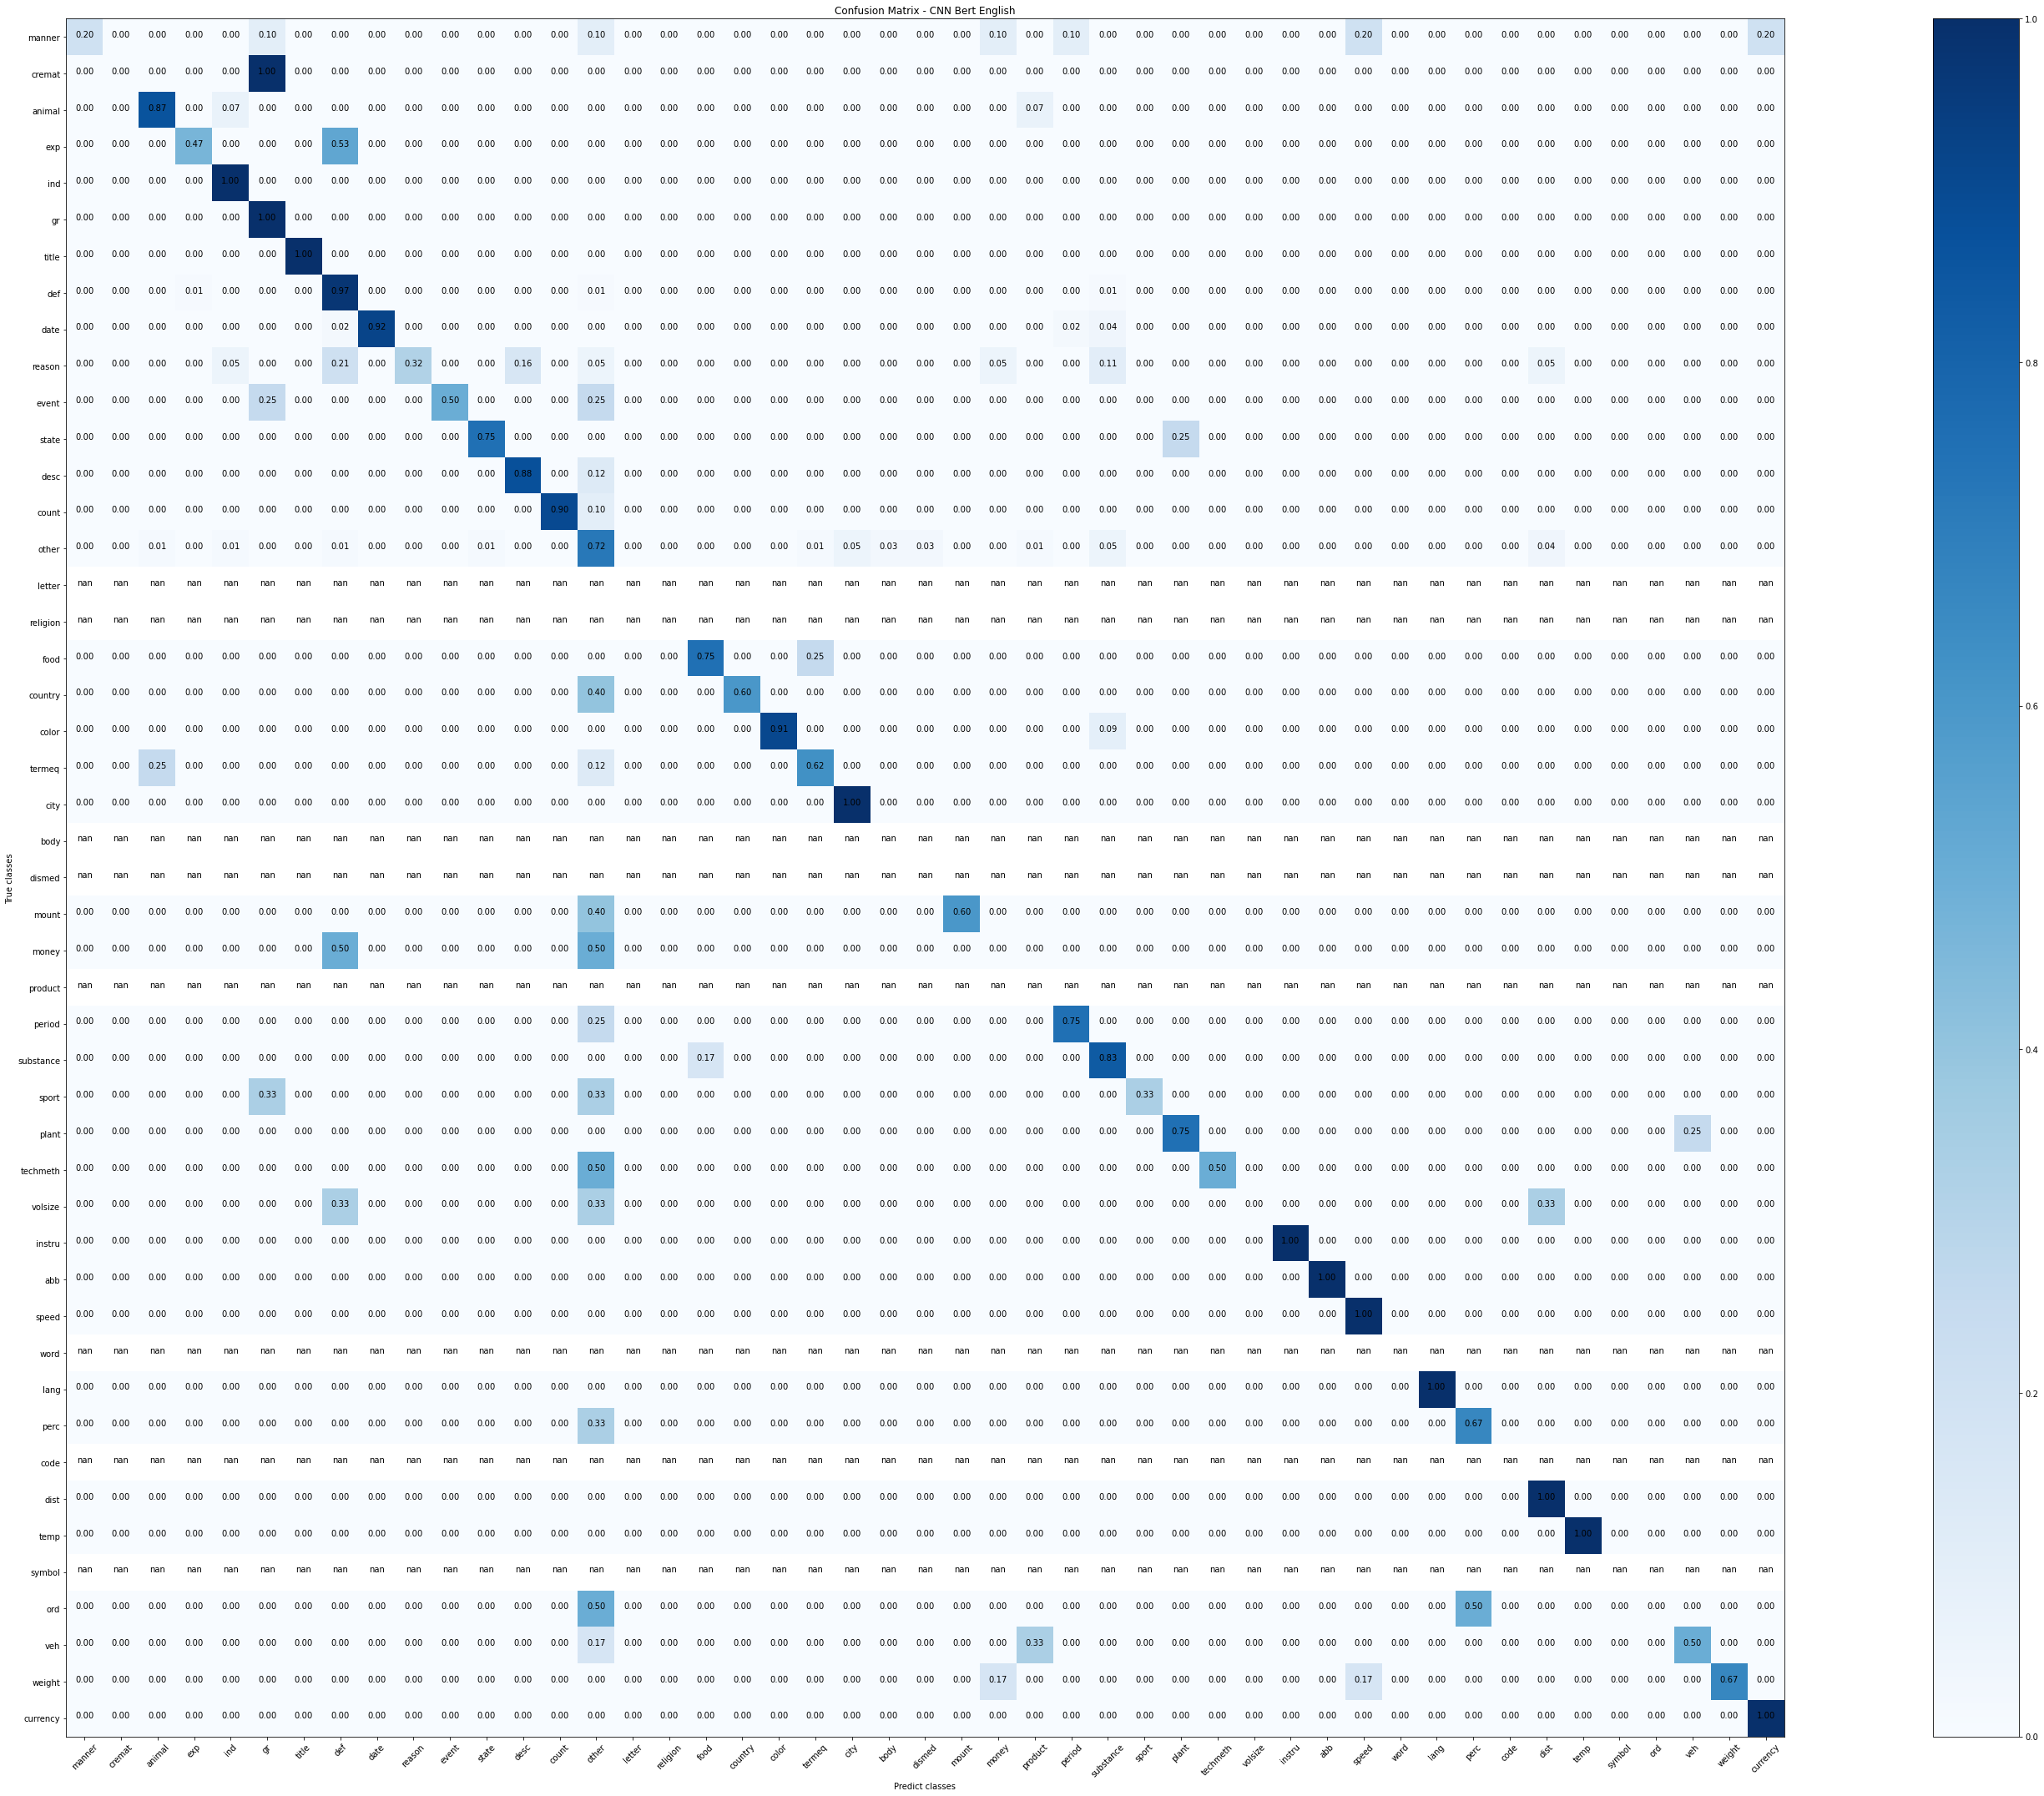

In [38]:
plot_confusion_matrix(confusion_matrix(prediction, targets, labels=classes), classes, title='Confusion Matrix - CNN Bert English')  

In [27]:
data = {'datetime': datetime.datetime.now(),
        'model': 'cnn_bert',
        'accuracy': accuracy_score(prediction, targets),
        'precision': precision_score(prediction, targets, average=metric_average),
        'recall': recall_score(prediction, targets, average=metric_average),
        'f1': f1_score(prediction, targets, average=metric_average),
        'mcc': matthews_corrcoef(prediction, targets),
        'confusion': confusion_matrix(prediction, targets, labels=classes),
        'run': run,
        'train_size': size_train,
        'execution_time': train_time,
        'test_time': test_time}

#     #report = metrics.classification_report(y_true=targets, y_pred=prediction, digits=3, output_dict=True)
#     return data

# data = calc_metrics_with_sklearn(clf, sentences_test, classes, train_size=size_train, train_time=train_time, run=run)

data

{'datetime': datetime.datetime(2020, 6, 25, 3, 37, 11, 583047),
 'model': 'cnn_bert',
 'accuracy': 0.81,
 'precision': 0.6980787934185148,
 'recall': 0.6422026099115883,
 'f1': 0.6352072510910117,
 'mcc': 0.7891661505948568,
 'confusion': array([[ 2,  0,  0, ...,  0,  0,  2],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0, 13, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  3,  0,  0],
        [ 0,  0,  0, ...,  0,  4,  0],
        [ 0,  0,  0, ...,  0,  0,  4]]),
 'run': 0,
 'train_size': 5500,
 'execution_time': 251.29780960083008,
 'test_time': 0.9650084972381592}

In [29]:
results = results.append([data])
# results.to_csv(save)   

#### Evaluate on HotpotQA

In [ ]:
import ujson as json

sys.path.insert(0, '/xdisk/msurdeanu/fanluo/hotpotQA/') 
from util import get_buckets
# HotpotQA Dataset
train_buckets = get_buckets('/xdisk/msurdeanu/fanluo/hotpotQA/train_record.pkl')
X_train = train_buckets[0]

# To map preprocessed questions from [idx] back to [words]
with open('/xdisk/msurdeanu/fanluo/hotpotQA/idx2word.json', 'r') as fh:	
    idx2word_dict = json.load(fh)
    
# To fetch the gold answer for each question
hotpot_train_file = "/xdisk/msurdeanu/fanluo/hotpotQA/train_eval.json"
with open(hotpot_train_file, "r", encoding = 'utf-8') as handle:
    hotpot_train = json.load(handle)

# Questions’ order in train_record.pkl is different from hotpot_train_v1.1.json and train_eval.json, can be mapped by _id

##### Run the model on HotpotQA

In [7]:
# Load the trained model
model = TextClassifier.load(base_path + '/final-model.pt')

2020-06-25 12:15:44,455 loading file flair_resources/qc_en_uiuc/final-model.pt


In [14]:
# Use dataframe to store questions 
question_list = []
for i, question in enumerate(X_train):
    ques_idxs = question['ques_idxs']
    ques_words = ' '.join([idx2word_dict[str(int(idx))] for idx in ques_idxs if idx>0])
    
    sentence = Sentence(ques_words, use_tokenizer=True)  # creat flair sentence
    if len(sentence.tokens) > 0:
        model.predict(sentence) 
    else:
        sentence.add_label('class', 'None') 
    
    ques_id = question['id']
    answer = hotpot_train[ques_id]['answer'][0]
    
    question_dict = {'ques_words':ques_words, 'answer_type_pred':sentence.labels[0] , 'answer':answer, 'ques_id':ques_id, 'ques_idxs':ques_idxs}
    question_list.append(question_dict)
    
question_df = pd.DataFrame(question_list)

question_df.head(3)

,ques_words,answer_type_pred,answer,ques_id,ques_idxs
0,Dance and Laugh Amongst the Rotten is the fift...,cremat (0.4358),the Netherlands,5adc07c7554299438c868d0c,"[tensor(3098), tensor(5), tensor(24505), tenso..."
1,The Novi engine is an American dual overhead c...,other (0.7403),Indianapolis 500,5ae6962055429908198fa63f,"[tensor(24), tensor(44424), tensor(1356), tens..."
2,"--OOV-- "" is a song by recording artist M.I.A....",date (0.9997),2013,5ae69dbd5542992ae0d1637b,"[tensor(1), tensor(10), tensor(12), tensor(8),..."


In [28]:
question_df.head(3)

,ques_words,answer_type_pred,answer,ques_id,ques_idxs,answer_type_pred_orig
0,Dance and Laugh Amongst the Rotten is the fift...,cremat,the Netherlands,5adc07c7554299438c868d0c,"[tensor(3098), tensor(5), tensor(24505), tenso...",cremat
1,The Novi engine is an American dual overhead c...,other,Indianapolis 500,5ae6962055429908198fa63f,"[tensor(24), tensor(44424), tensor(1356), tens...",other
2,"--OOV-- "" is a song by recording artist M.I.A....",date,2013,5ae69dbd5542992ae0d1637b,"[tensor(1), tensor(10), tensor(12), tensor(8),...",date


In [ ]:
question_df['answer_type_pred_orig'] = question_df['answer_type_pred']
question_df['answer_type_pred'] = question_df.answer_type_pred.map(lambda x: x.to_dict()['value'])
question_df['answer_type_pred_confidence'] = question_df.answer_type_pred_orig.map(lambda x: x.to_dict()['confidence'])
question_df.head(3)

In [29]:
question_df.answer_type_pred.describe()

count     89791
unique       47
top         ind
freq      28415
Name: answer_type_pred, dtype: object

In [30]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89791 entries, 0 to 89790
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ques_words             89791 non-null  object
 1   answer_type_pred       89791 non-null  object
 2   answer                 89791 non-null  object
 3   ques_id                89791 non-null  object
 4   ques_idxs              89791 non-null  object
 5   answer_type_pred_orig  89791 non-null  object
dtypes: object(6)
memory usage: 4.1+ MB


In [31]:
# Distribution of predicted Answer types
grouped = question_df.groupby(['answer_type_pred'])
type_counts = grouped.size()  # count of each type
type_counts

answer_type_pred
abb             10
animal         949
body             4
city          1237
code           150
color           16
count         2178
country       2832
cremat       12679
currency         8
date          8839
def            157
desc          1922
dismed          96
dist           150
event         1756
exp            116
food           450
gr            2375
ind          28415
instru          54
lang            49
letter           2
manner        2500
money           50
mount          234
ord             27
other        12075
perc            34
period         475
plant          364
product        383
reason        1790
religion        59
speed           11
sport         2898
state         2453
substance       35
symbol           5
techmeth        75
temp             2
termeq         698
title          867
veh            257
volsize         32
weight           6
word            17
dtype: int64

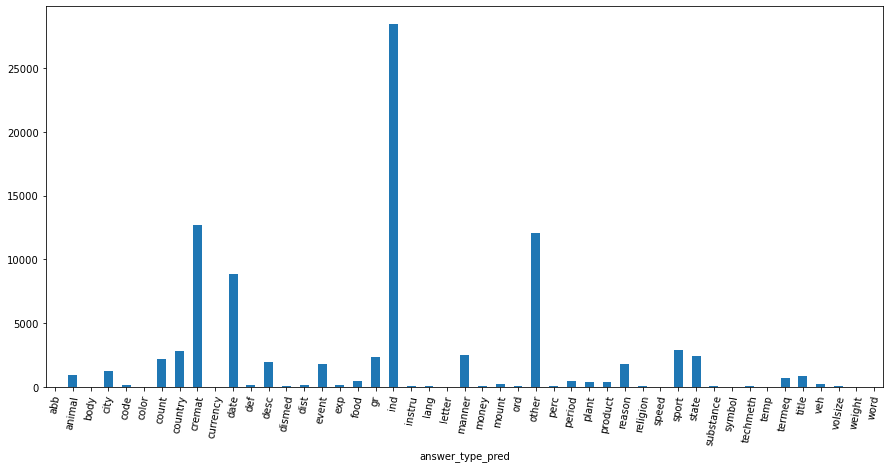

In [32]:
# also distribution of answer_type_pred
type_counts.plot(kind = 'bar', figsize=(15, 7))
plt.xticks(fontsize=10, rotation=80)
plt.show()
# plt.savefig('type_Distribution.png')

In [36]:
# ids of questions randomly sampled with rule-based classifier, using same ones for comparison
random_idx = [19695, 83582, 9255, 37406, 17281, 72701, 65941, 69290, 55715, 30785, 13755, 71594, 4126, 57197, 63511, 89168, 300, 65359, 39041, 33578, 86761, 14973, 46530, 4461, 3241, 3701, 79451, 1324, 55939, 31776]
mini_question_df = question_df.loc[random_idx, ['ques_words', 'answer', 'answer_type_pred']].copy()
mini_question_df['answer_type_label'] = np.nan            # add a column for manual label
pd.set_option('display.max_colwidth', -1)                 # display full (non-truncated)  column
mini_question_df

/xdisk/msurdeanu/fanluo/miniconda3/envs/hotpotqa/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


,ques_words,answer,answer_type_pred,answer_type_label
19695,Darren marquez is an offensive lineman who played college football where before being hired by friends university in wichita ks as assistant coach,Southern Illinois Salukis.,other,NaN
83582,Jeep Gladiator is based on this car that was sold and produced from 1963 to when ?,1991,other,NaN
9255,What actor in the Calendar Girl Murders was born in March ?,Sharon Stone,ind,NaN
37406,Craig Frost is known as the keyboardist fo an American rock band whose names is a play on words of what ?,Grand Trunk Western Railroad,ind,NaN
17281,Diana Ross 's song I 'm Coming Out was written and produced by Nile Rodgers who was part of what band that has been active since 1976 ?,Chic,event,NaN
72701,When was the songwriter of the song by The Beach boys refering to the --OOV-- born ?,"March 15, 1941",date,NaN
65941,Which luxury sedan 's --OOV-- is called the Master ?,Toyota Crown,other,NaN
69290,"In which year did Aimé Césaire publish her work , which was a response to Shakespeare 's play "" The Tempest ? """,1969,other,NaN
55715,Which country did both Klemens von Metternich and Richard von Metternich represent ?,Austrian,country,NaN
30785,"Which Swiss skier came in eights in the 7.5 km sprint event at the 2002 Winter Olympics in Salt Lake City , Utah ?",Andreas Hartmann,ind,NaN


##### Manually label

In [37]:
mini_question_df.loc[random_idx[0], 'answer_type_label'] = 'LOC:other'
mini_question_df.loc[random_idx[1], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[2], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[3], 'answer_type_label'] = 'ENTY:word'
mini_question_df.loc[random_idx[4], 'answer_type_label'] = 'HUM:gr'
mini_question_df.loc[random_idx[5], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[6], 'answer_type_label'] = 'ENTY:vehicle'
mini_question_df.loc[random_idx[7], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[8], 'answer_type_label'] = 'LOC:country'
mini_question_df.loc[random_idx[9], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[10], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[11], 'answer_type_label'] = 'ENTY:cremat'
mini_question_df.loc[random_idx[12], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[13], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[14], 'answer_type_label'] = 'LOC:city'
mini_question_df.loc[random_idx[15], 'answer_type_label'] = 'HUM:gr'
mini_question_df.loc[random_idx[16], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[17], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[18], 'answer_type_label'] = 'NUM:count'
mini_question_df.loc[random_idx[19], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[20], 'answer_type_label'] = 'LOC:country'
mini_question_df.loc[random_idx[21], 'answer_type_label'] = 'ENTY:termeq'
mini_question_df.loc[random_idx[22], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[23], 'answer_type_label'] = 'LOC:other'
mini_question_df.loc[random_idx[24], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[25], 'answer_type_label'] = 'NUM:date'
mini_question_df.loc[random_idx[26], 'answer_type_label'] = 'ENTY:religion'
mini_question_df.loc[random_idx[27], 'answer_type_label'] = 'HUM:gr'
mini_question_df.loc[random_idx[28], 'answer_type_label'] = 'HUM:ind'
mini_question_df.loc[random_idx[29], 'answer_type_label'] = 'HUM:ind'

In [38]:
mini_question_df

,ques_words,answer,answer_type_pred,answer_type_label
19695,Darren marquez is an offensive lineman who played college football where before being hired by friends university in wichita ks as assistant coach,Southern Illinois Salukis.,other,LOC:other
83582,Jeep Gladiator is based on this car that was sold and produced from 1963 to when ?,1991,other,NUM:date
9255,What actor in the Calendar Girl Murders was born in March ?,Sharon Stone,ind,HUM:ind
37406,Craig Frost is known as the keyboardist fo an American rock band whose names is a play on words of what ?,Grand Trunk Western Railroad,ind,ENTY:word
17281,Diana Ross 's song I 'm Coming Out was written and produced by Nile Rodgers who was part of what band that has been active since 1976 ?,Chic,event,HUM:gr
72701,When was the songwriter of the song by The Beach boys refering to the --OOV-- born ?,"March 15, 1941",date,NUM:date
65941,Which luxury sedan 's --OOV-- is called the Master ?,Toyota Crown,other,ENTY:vehicle
69290,"In which year did Aimé Césaire publish her work , which was a response to Shakespeare 's play "" The Tempest ? """,1969,other,NUM:date
55715,Which country did both Klemens von Metternich and Richard von Metternich represent ?,Austrian,country,LOC:country
30785,"Which Swiss skier came in eights in the 7.5 km sprint event at the 2002 Winter Olympics in Salt Lake City , Utah ?",Andreas Hartmann,ind,HUM:ind


##### Evaluation

In [39]:
# save annotated dataframe as a html
mini_question_df.to_html('answer_type_classification_BertCNN.html')

In [42]:
from sklearn.metrics import accuracy_score
fine_label = mini_question_df.answer_type_label.map(lambda x: x.split(':')[1])
# accuracy of fine-grained answer type classification
accuracy_score(fine_label, mini_question_df.answer_type_pred)   

0.6